In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import ast
import emoji
import os

In [2]:
if not os.path.exists("reddit_procesados.csv"):
    raise FileNotFoundError("El archivo reddit_procesados.csv no se encuentra en la carpeta actual.")
df = pd.read_csv("reddit_procesados.csv")

In [3]:
df.head(5)

,user_name,text,Hashtags,URLs,Prices,Emoticons,Mentions
0,AutoModerator,"# Greetings!\n\n&;\n\nThis is the monthly ""Ope...",[],['https://www.reddit.com/r/Twitter/wiki/suspen...,[],[],[]
1,Skywalkerjet3D,https://preview.redd.it/0thr1crjqgme1.png?widt...,[],['https://preview.redd.it/0thr1crjqgme1.png?wi...,[],[],[]
2,Tammera4u,"So I rarely use it, but it spams my notificati...",[],[],[],[],[]
3,StunningRole9745,Is there still a website or app that can autom...,[],[],[],[],[]
4,TrueJohnWick,After 3 weeks of filling out more than a dozen...,[],[],[],[],[]


In [4]:
# dropna() para evitar errores por NaN al procesar
# apply(ast.literal_eval) para convertir las cadenas de texto que representan listas en listas reales de Python

df["Hashtags"] = df["Hashtags"].dropna().apply(ast.literal_eval)
df["URLs"] = df["URLs"].dropna().apply(ast.literal_eval)
df["Prices"] = df["Prices"].dropna().apply(ast.literal_eval)
df["Emoticons"] = df["Emoticons"].dropna().apply(ast.literal_eval)
df["Mentions"] = df["Mentions"].dropna().apply(ast.literal_eval)

In [5]:
df.head(5)

,user_name,text,Hashtags,URLs,Prices,Emoticons,Mentions
0,AutoModerator,"# Greetings!\n\n&;\n\nThis is the monthly ""Ope...",[],[https://www.reddit.com/r/Twitter/wiki/suspend...,[],[],[]
1,Skywalkerjet3D,https://preview.redd.it/0thr1crjqgme1.png?widt...,[],[https://preview.redd.it/0thr1crjqgme1.png?wid...,[],[],[]
2,Tammera4u,"So I rarely use it, but it spams my notificati...",[],[],[],[],[]
3,StunningRole9745,Is there still a website or app that can autom...,[],[],[],[],[]
4,TrueJohnWick,After 3 weeks of filling out more than a dozen...,[],[],[],[],[]


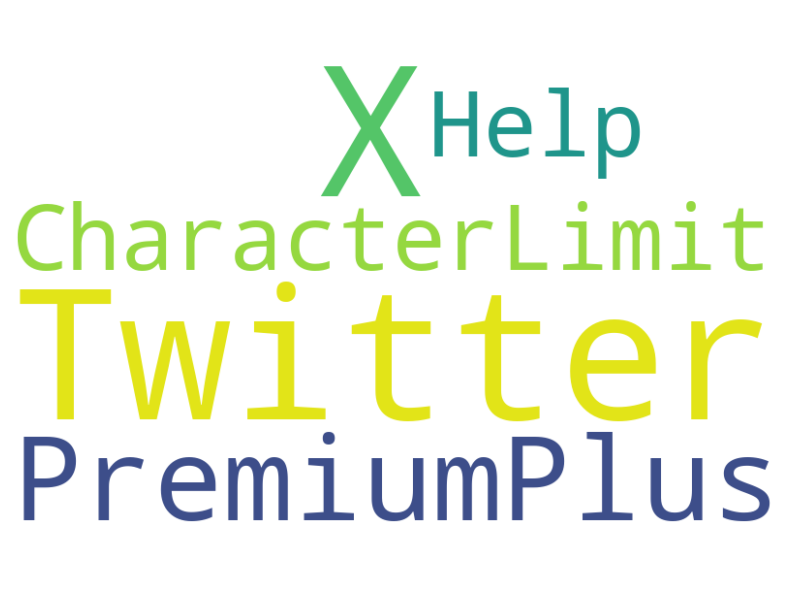

In [6]:
hashtags_series = df['Hashtags'].explode().dropna()
hashtags_text = ' '.join(hashtags_series.astype(str))

wordcloud = WordCloud(
    width=800,
    height=600,
    background_color="white",
    max_words=100,
    collocations=False
).generate(hashtags_text)

wordcloud.generate(hashtags_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

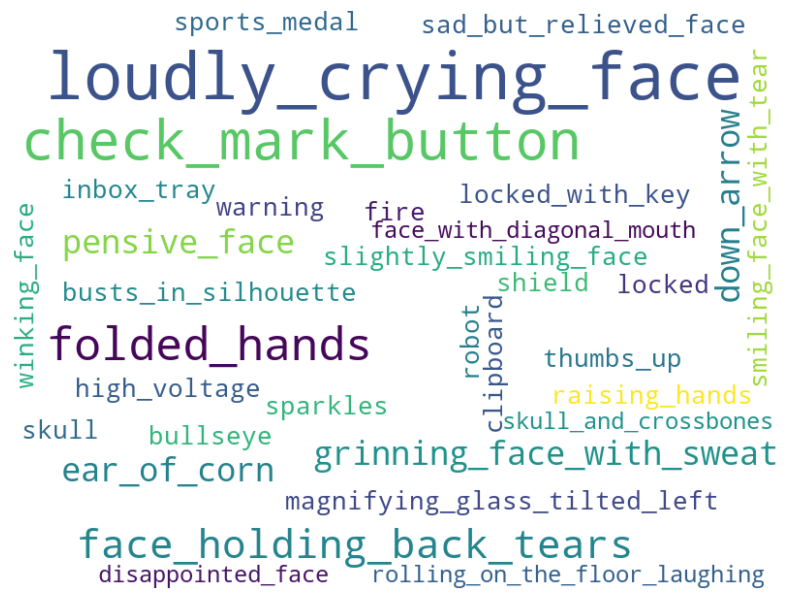


Top 5 emojis más usados:
✅ - check_mark_button (6 veces)
😭 - loudly_crying_face (4 veces)
🙏 - folded_hands (4 veces)
😔 - pensive_face (2 veces)
😅 - grinning_face_with_sweat (2 veces)


In [7]:
emojis_series = df['Emoticons'].explode()
emojis_text = ' '.join(emojis_series.dropna().astype(str))

emojis_text_desc = emoji.demojize(emojis_text, delimiters=(" ", " "))

emoji_counts = Counter(emojis_series)

top_5_emojis = emoji_counts.most_common(5)

top_5_list = [(e, emoji.demojize(e).replace(":", ""), count) for e, count in top_5_emojis]

wordcloud = WordCloud(
    width=800,
    height=600,
    background_color="white",
    max_words=100,
    collocations=False
).generate(emojis_text_desc)

wordcloud.generate(emojis_text_desc)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

print("\nTop 5 emojis más usados:")
for emoji_char, description, count in top_5_list:
    print(f"{emoji_char} - {description} ({count} veces)")


Maximum price: 16000.0


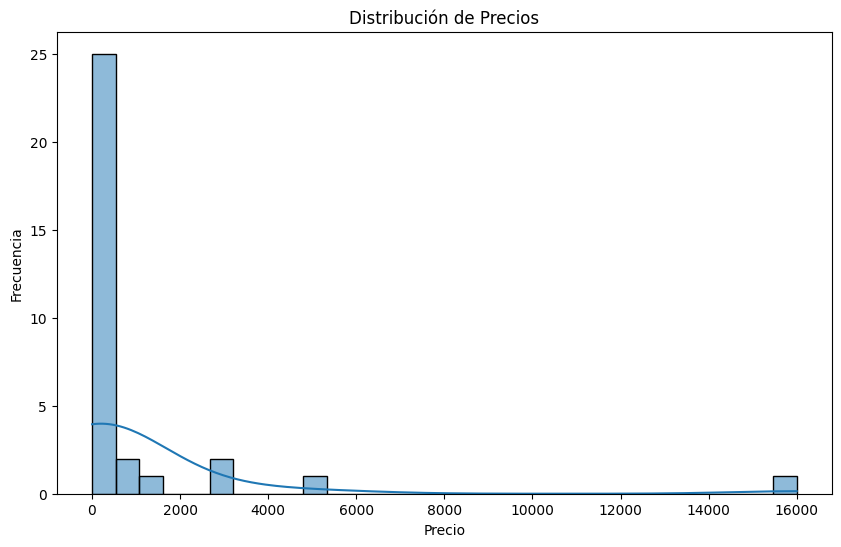

Estadísticas de precios:
count       32.000000
mean      1014.051250
std       2967.458188
min          3.000000
25%         10.475000
50%         46.000000
75%        389.750000
max      16000.000000
dtype: float64


In [8]:
def safe_convert(x):
    if isinstance(x, list):
        float_list = []
        for elem in x:
            if isinstance(elem, str):
                elem = elem.replace("$", "").replace(",", "").strip()
                try:
                    float_list.append(float(elem))
                except ValueError:
                    pass
            elif isinstance(elem, (int, float)):
                float_list.append(float(elem))
        return float_list
    elif isinstance(x, str):
        try:
            try:
                val = ast.literal_eval(x)
            except (SyntaxError, ValueError):
                val = []

            if isinstance(val, list):
                float_list = []
                for elem in val:
                    if isinstance(elem, str):
                        elem = elem.replace("$", "").replace(",", "").strip()
                        float_list.append(float(elem))
                    elif isinstance(elem, (int, float)):
                        float_list.append(float(elem))
                return float_list
            else:
                return [float(val)]
        except:
            return []
    else:
        return []

df["ConvertedPrices"] = df["Prices"].apply(safe_convert)

all_prices = [
    price 
    for sublist in df["ConvertedPrices"] 
    for price in sublist 
    if isinstance(price, (int, float))
]

if all_prices:
    max_price = max(all_prices)
    print(f"Maximum price: {max_price}")
else:
    print("No valid prices found.")


prices = [p for sublist in df["ConvertedPrices"] for p in sublist if isinstance(p, (int, float))]
filtered_prices = [p for p in prices if p < 1000000]
if filtered_prices:
    plt.figure(figsize=(10, 6))
    sns.histplot(filtered_prices, bins=30, kde=True)
    plt.title('Distribución de Precios')
    plt.xlabel('Precio')
    plt.ylabel('Frecuencia')
    plt.show()

    print("Estadísticas de precios:")
    print(pd.Series(filtered_prices).describe())

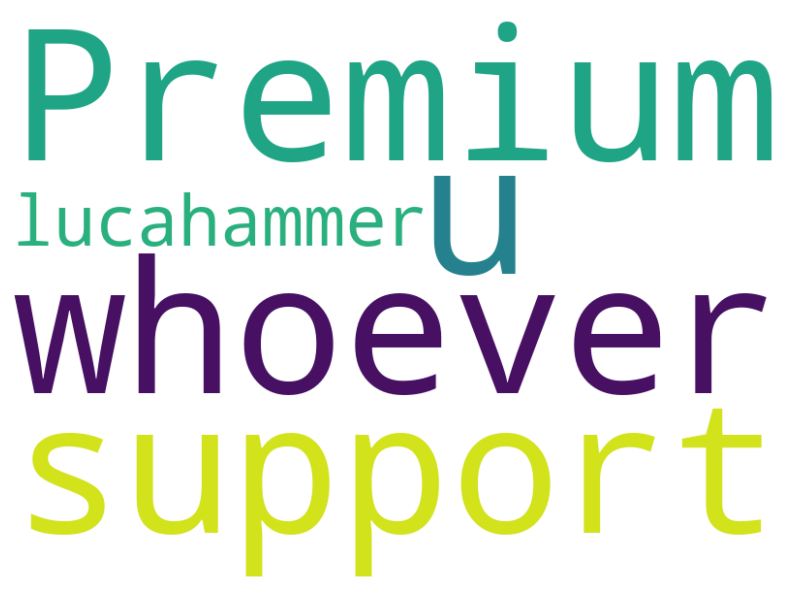

/var/folders/f6/1hghhh1x5nq6k8k89mc457j40000gq/T/ipykernel_26285/1332764677.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[m[1] for m in top_mentions], y=[m[0] for m in top_mentions], palette="Blues_r")


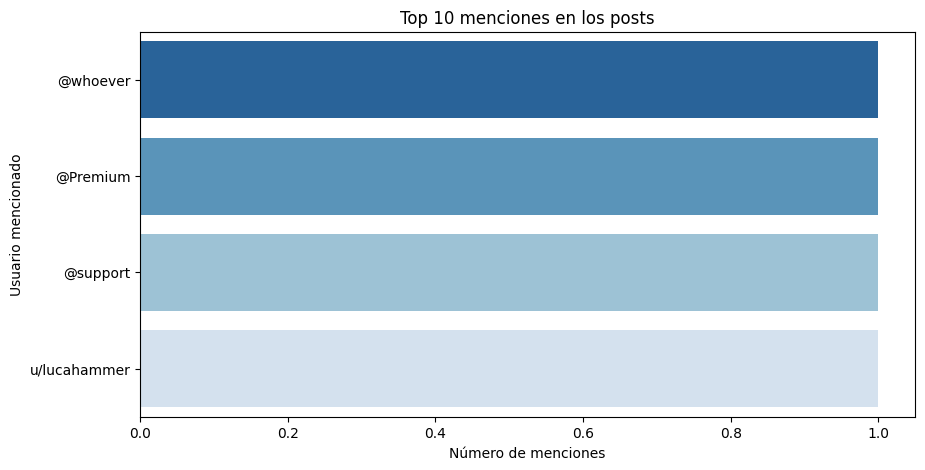

In [9]:
mentions_series = df['Mentions'].explode()
mentions_text = ' '.join(mentions_series.dropna().astype(str))

wordcloud = WordCloud(
    width=800,
    height=600,
    background_color="white",
    max_words=100,
    collocations=False
).generate(mentions_text)

wordcloud.generate(mentions_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

mentions_counts = Counter(mentions_series.dropna())
top_mentions = mentions_counts.most_common(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=[m[1] for m in top_mentions], y=[m[0] for m in top_mentions], palette="Blues_r")
plt.xlabel("Número de menciones")
plt.ylabel("Usuario mencionado")
plt.title("Top 10 menciones en los posts")
plt.show()
